<a href="https://colab.research.google.com/github/ksr353/Karleigh/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


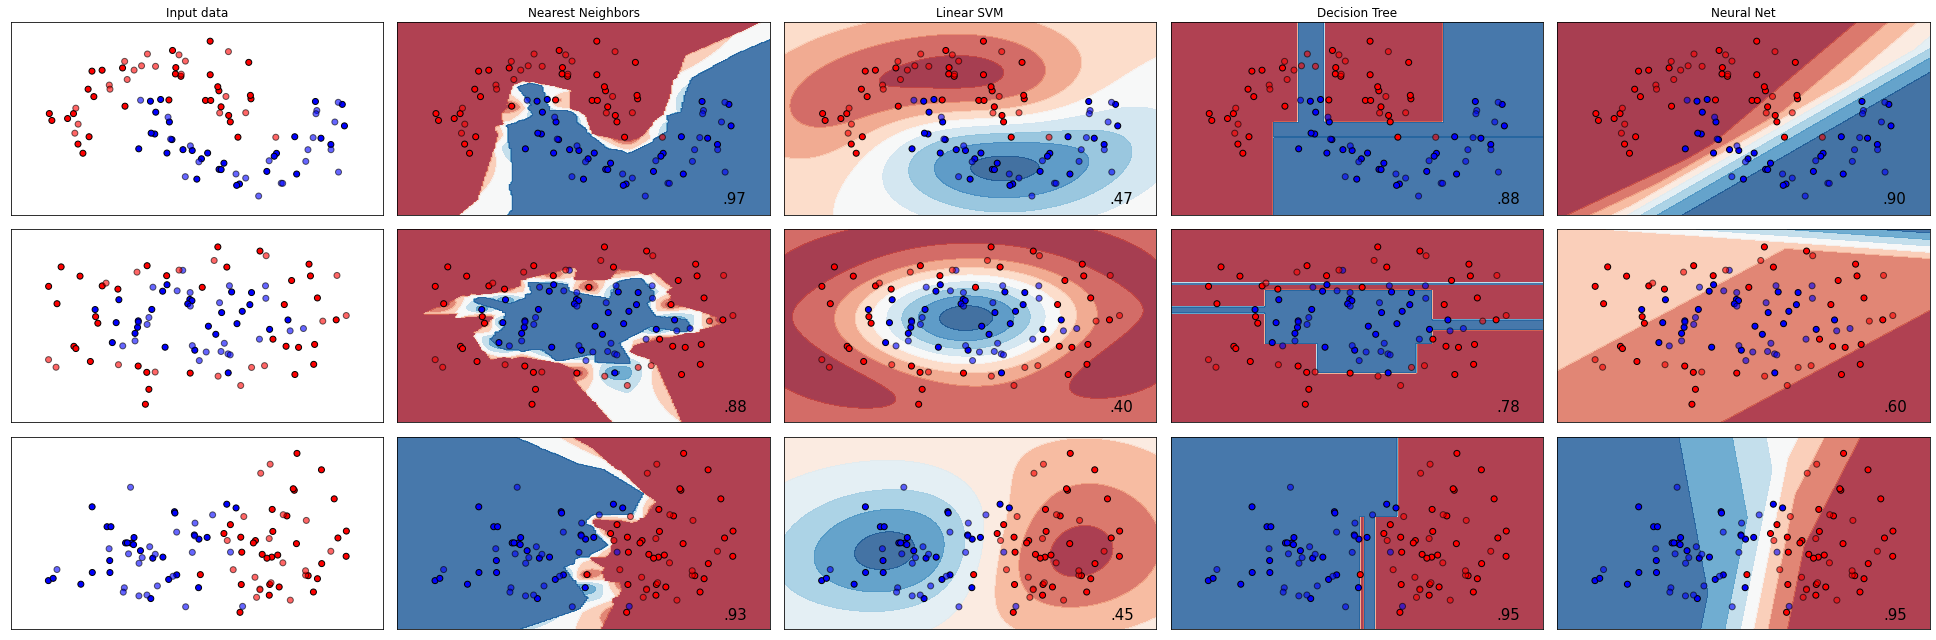

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


def makeDatasets(num_samp=100, noise=0.2):
    """
            Create Datasets that we will do some simple learning on

            Input:
            -

            Returns:
            - A vector of 3 datasets that we will use for some simple machine learning exepriments
    """

    #  Create a dataset with two classes where classes can be separated by a line
    X, y = make_classification(n_samples=num_samp, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)  # make a classification dataet
    rng = np.random.RandomState(2)   # Seed the random number generator
    X += 2 * rng.uniform(size=X.shape)  # Generate some random elements for the dataset
    linearly_separable = (X, y)      #  package it all together

    #  make a dataset that is made of crescent shapes
    moons = make_moons(n_samples=num_samp, noise=noise, random_state=0)

    #  make a third dataset that is made of concentric circles
    circles = make_circles(n_samples=num_samp, noise=noise, factor=0.5, random_state=1)

    #  place these datasets in a vector for ease of use later
    datasets = [moons, circles, linearly_separable]

    return datasets


def prepDatasets(dataset):
    """
            Preprocess dataset, split into training and testing sets and returns some metadata regarding dataset

            Input:
            - a scipy dataset

            Returns:
            - X_train the training data
            - X_test the testing data
            - y_train the training data labels
            - y_test the testing data labels
            - X all the data
            - y all the labels
    """
    #
    X, y = dataset  # get all the data and labels from the passed dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) # split the X and Y  into training and test



    return X_train, X_test, y_train, y_test, X, y


def plotDataSet(classifiers, datasets, names):
    """
                Plots the results of a set of classifiers on a set of datasets

                Input:
                - Classifiers =  a vector of classifiers that you wish to test
                - datasets =  a vector of datasets that you wish to use to test the classifiers
                - names = a vector of names of the classifiers

                Returns:
                -
        """

    h = 0.02
    figure = plt.figure(figsize=(27, 9))
    i = 1
    for ds_cnt, ds in enumerate(datasets):
        cm = plt.cm.RdBu

        X_train, X_test, y_train, y_test, X, y = prepDatasets(ds)

        #####################################################################################
        # plot the data colored by label on the graph
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
        ####################################################################################


        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
            # Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
            i += 1

    plt.tight_layout()
    plt.show()
3

def testClassifiers():
    ##############################################################################
    # TODO: Play with the hyperparameter for each of the algorithms below        #
    # Try and find an algorithm and set of hyperparamters that performs well     #
    # on each dataset                                                            #
    # The number in the bottom right is the accuracy of that model on the        #
    # test set for that particular dataset (higher is better)                    #
    # Try and develop an intuition about why the chosen hyperparameters work     #
    #                                                                            #
    ##############################################################################

    #  K Nearest Neighbor Classifier
    #  n_neighbors= the number of neighbors that vote on the classification
    #  weights= specifies how each of the k neighbors votes are weighted choices are  ‘uniform’, ‘distance’ uniform gives all neighbors equal weight distance: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    #  metric= determines how distance is measured we will leave this as 'minkowski
    #  p=  is a hyperparameter that is used tell how distance is measured if set to 1 it will be manhattan distance if it is set to 2 it will be euclidean distance numbers in between will blend the two
    KNN = KNeighborsClassifier(n_neighbors=2, weights='distance', metric='minkowski',  p=2)

    #  Kernel= Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.
    #  C= is a regularization parameter that is used to help prevent overfitting it must be positive
    #  degree= Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
    SVM = SVC(kernel="rbf", C=0.001, degree=6)

    # criterion= The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for information gain.
    # splitter=  The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
    # max_depth= The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    # min_samples_split= The minimum number of samples required to add a new decision and split further
    # min_sample_leaf= The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This will help with overfitting
    DTC = DecisionTreeClassifier(max_depth=200, criterion="entropy", splitter="best", min_samples_split=2, min_samples_leaf=1)

    # hidden_layer_sizes= The ith element represents the number of neurons in the ith hidden layer.
    # activation=
    #               Activation function for the hidden layer.
    #                   ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    #                   ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
    #                   ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
    # max_iter= Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations.
    # alpha= L2 penalty (regularization term) parameter. This term helps with overfitting the higher it is the less the model will try to fit the data
    # learning_rate = Learning rate schedule for weight updates.
    #               ‘constant’ is a constant learning rate given by ‘learning_rate_init’.
    #               ‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)
    #               ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.
    MLP = MLPClassifier(hidden_layer_sizes=[2], max_iter=1000, activation='relu',  learning_rate='constant', learning_rate_init=0.001, alpha=0.0001)

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

    ####################################################################################################################
    # Package everything up and send it to be graphed
    names = ["Nearest Neighbors", "Linear SVM", "Decision Tree", "Neural Net"]
    classifiers = [KNN, SVM, DTC, MLP]
    datasets = makeDatasets(num_samp=100)
    plotDataSet(classifiers=classifiers, datasets=datasets, names=names)

    ####################################################################################################################

if __name__ == "__main__":
    testClassifiers()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets as ds
from sklearn import metrics


def makeDatasets(num_samp=100, noise=0.2, datasetChoice=1):
    """
            Create Datasets that we will do some simple learning on

            Input:
            -

            Returns:
            - A vector of 3 datasets that we will use for some simple machine learning exepriments
    """
    if datasetChoice == 1:
        dataset = datasets.load_iris()
    elif datasetChoice == 2:
        dataset = datasets.load_digits()
    else:
        dataset = datasets.load_boston()

    return dataset


def prepDatasets(dataset):
    """
            Preprocess dataset, split into training and testing sets and returns some metadata regarding dataset

            Input:
            - a scipy dataset

            Returns:
            - X_train the training data
            - X_test the testing data
            - y_train the training data labels
            - y_test the testing data labels
            - X all the data
            - y all the labels
    """
    #
    X, y = dataset  # get all the data and labels from the passed dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) # split the X and Y  into training and test



    return X_train, X_test, y_train, y_test, X, y


def runAndPrint(classifier, datasetChoice):
    # the following gets the dataset runs the models and writes the summary statistics

    if datasetChoice == 1:
        X, y = ds.load_iris(return_X_y=True)
        bunch = ds.load_iris()
        print(bunch["DESCR"])
        print("List of Features to Learn from")
        print(bunch['feature_names'])
        target_names = bunch['target_names']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)
        classifier.fit(X_train, y_train)
        predicted = classifier.predict(X_test)
        print(
            f"Classification report for classifier {classifier}:\n" f"{metrics.classification_report(y_test, predicted, target_names=target_names)}\n")

    elif datasetChoice == 2:
        bunch = ds.load_digits()
        print(bunch["DESCR"])
        print("List of Features to Learn from")
        print(bunch['feature_names'])
        target_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
        n_samples = len(bunch.images)
        data = bunch.images.reshape((n_samples, -1))
        X_train, X_test, y_train, y_test = train_test_split(data, bunch.target, test_size=0.5, shuffle=True)
        classifier.fit(X_train, y_train)
        predicted = classifier.predict(X_test)
        print(
            f"Classification report for classifier {classifier}:\n" f"{metrics.classification_report(y_test, predicted, target_names=target_names)}\n")

    elif datasetChoice == 3:
        X, y = ds.load_wine(return_X_y=True)
        bunch = ds.load_wine()
        print(bunch["DESCR"])
        print("List of Features to Learn from")
        print(bunch['feature_names'])
        target_names = bunch['target_names']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)
        classifier.fit(X_train, y_train)
        predicted = classifier.predict(X_test)
        print(
            f"Classification report for classifier {classifier}:\n" f"{metrics.classification_report(y_test, predicted, target_names=target_names)}\n")

    elif datasetChoice == 4:
        X, y = ds.load_breast_cancer(return_X_y=True)
        bunch = ds.load_breast_cancer()
        print(bunch["DESCR"])
        print("List of Features to Learn from")
        print(bunch['feature_names'])
        target_names = bunch['target_names']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)
        classifier.fit(X_train, y_train)
        predicted = classifier.predict(X_test)
        print(
            f"Classification report for classifier {classifier}:\n" f"{metrics.classification_report(y_test, predicted, target_names=target_names)}\n")



    elif datasetChoice == 5:
        bunch = ds.fetch_lfw_people()
        n_samples = len(bunch.images)
        data = bunch.images.reshape((n_samples, -1))
        print(bunch["DESCR"])
        target_names = bunch['target_names']
        X_train, X_test, y_train, y_test = train_test_split(data, bunch.target, test_size=0.5, shuffle=True)
        classifier.fit(X_train, y_train)
        predicted = classifier.predict(X_test)
        print(
            f"Classification report for classifier {classifier}:\n" f"{metrics.classification_report(y_test, predicted)}\n")

    elif datasetChoice == 6:
        X, y = ds.fetch_20newsgroups_vectorized(return_X_y=True)
        bunch = ds.fetch_20newsgroups_vectorized()
        target_names = bunch['target_names']
        print(bunch["DESCR"])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)
        classifier.fit(X_train, y_train)
        predicted = classifier.predict(X_test)
        print(
            f"Classification report for classifier {classifier}:\n" f"{metrics.classification_report(y_test, predicted, target_names=target_names)}\n")

    else:
        X, y = ds.fetch_olivetti_faces(return_X_y=True)
        bunch = ds.fetch_olivetti_faces()
        print(bunch["DESCR"])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, shuffle=True)
        classifier.fit(X_train, y_train)
        predicted = classifier.predict(X_test)
        print(
            f"Classification report for classifier {classifier}:\n" f"{metrics.classification_report(y_test, predicted)}\n")

    print("Accuracy= (True Positive + True Negative)/(Total)")
    print("Precision= True Positive/False Positive")
    print("Recall= (True Positive)/(True Positive + False Positive)")
    print("F1= 2 x (Precision * Recall)/(Precision + Recall)")
    print("Support= Number of instances of that class")


def testClassifiers():
    ##############################################################################
    # TODO: Play with the hyperparameter for each of the algorithms below        #
    # Try and find an algorithm and set of hyperparamters that performs well     #
    # on each dataset                                                            #
    # The number in the bottom right is the accuracy of that model on the        #
    # test set for that particular dataset (higher is better)                    #
    # Try and develop an intuition about why the chosen hyperparameters work     #
    #                                                                            #
    ##############################################################################

    #Easier Datasets
    # 1= iris
    # 2= mnist handwritten digits dataset
    # 3= wine dataset
    # 4= breast cancer dataset

    #Harder Datasets
    # 5= lfw_people
    # 6= 20newsgroups
    # 7= Olivetti faces
    datasetChoice = 4

    # 1= K Nearest Neighbor Classifier
    # 2= Support Vector Machine Classifier
    # 3= Decision Tree Classifier
    # 4= Neural Net Classifier
    classifierChoice = 1

    #  K Nearest Neighbor Classifier
    #  n_neighbors= the number of neighbors that vote on the classification
    #  weights= specifies how each of the k neighbors votes are weighted choices are  ‘uniform’, ‘distance’ uniform gives all neighbors equal weight distance: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    #  metric= determines how distance is measured we will leave this as 'minkowski
    #  p=  is a hyperparameter that is used tell how distance is measured if set to 1 it will be manhattan distance if it is set to 2 it will be euclidean distance numbers in between will blend the two
    KNN = KNeighborsClassifier(n_neighbors=4, weights='uniform', metric='minkowski',  p=1)

    #  Support Vector Machine Classifier
    #  Kernel= Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.
    #  C= is a regularization parameter that is used to help prevent overfitting it must be positive
    #  degree= Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
    SVM = SVC(kernel="linear", C=1.000, degree=3)

    # Decision Tree Classifier
    # criterion= The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
    # splitter=  The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
    # max_depth= The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    # min_samples_split= The minimum number of samples required to add a new decision and split further
    # min_sample_leaf= The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This will help with overfitting
    DTC = DecisionTreeClassifier(max_depth=1, criterion="gini", splitter="best", min_samples_split=3, min_samples_leaf=1)

    # Neural Net Classifier
    # hidden_layer_sizes= The ith element represents the number of neurons in the ith hidden layer.
    # activation=
    #               Activation function for the hidden layer.
    #                   ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    #                   ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
    #                   ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
    # max_iter= Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations.
    # alpha= L2 penalty (regularization term) parameter. This term helps with overfitting the higher it is the less the model will try to fit the data
    # learning_rate = Learning rate schedule for weight updates.
    #               ‘constant’ is a constant learning rate given by ‘learning_rate_init’.
    #               ‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)
    #               ‘adaptive’ keeps the learning rate const0.33  0.33  ant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.
    MLP = MLPClassifier(hidden_layer_sizes=[100, 100, 100], max_iter=100, activation='relu',  learning_rate='adaptive', learning_rate_init=0.001, alpha=0.00001)


    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

    if classifierChoice == 1:
        classifier = KNN
    elif classifierChoice == 2:
        classifier = SVM
    elif classifierChoice == 3:
        classifier = DTC
    else:
        classifier = MLP

    runAndPrint(classifier, datasetChoice)

if __name__ == "__main__":
    testClassifiers()


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi